<h1><center><b>BOSCH-FIT.Fest 2023</b></center></h1>
<h2><center><b>License Plate Recognition</b></center></h2>
<h3><center><b>AI Team BGSV</b></center></h3>

## Abstract
##### This is the baseline that you can try with hands-on to get the overview how a process of Artfifical Intelligence works for the task **License Plate Recognition**. We recommend you use the launch of YOLOv5 model for the detection stage and module EasyOCR for the recognition stage.

## References
* Detection stage
1. [Install required packages](#detect_requirement)
2. [Train model with your datasets](#detect_train)
3. [Evaluate model on validation datasets](#detect_valid)
4. [Test model on samples](#detect_test)
* Recognition stage
1. [Install required packages](#recognize_requirement)
2. [Show usage example](#recognize_example)
3. [Recognize the number text on detected plates](#recognize_detectedplates)

## Detection stage

### Install required pakages


In [ ]:
!pip install -r ./yolov5/requirements.txt

In [ ]:
!pip install easyocr

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2

In [ ]:

import easyocr

### Train model 

Preparation: <br>
    - Download the dataset: [here](https://bosch-my.sharepoint.com/:u:/p/neo81hc/EZjdKG78ZS9JhfWu3QHt9PYBsexbW1S20m9ASe6ifMmdQQ?e=YhH0g3) <br>
    - Extract the dataset named ALPR_dataset and organize the folder as below: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ALPR <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ ALPR_dataset <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ train <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ images <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ labels <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ val <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ images <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ labels <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ ALPR.ipynb <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|_ yolov5 <br>

In [ ]:
!python ./yolov5/train.py --img 640 --batch 8 --epochs 100 --data yolov5_carPlate.yaml --weights yolov5s.pt --device 0

### Evaluate model on validation datasets
Change 'exp' with the following training result directory

In [3]:
!python ./yolov5/val.py --weights ./yolov5/runs/train/exp5/weights/best.pt --data yolov5_carPlate.yaml --img 640 --half

### Test model on samples 
Download some images contain the vehicle including plates to 'yolov5/data/images' and run the command below to detect

In [4]:
!python ./yolov5/detect.py --weights ./yolov5/runs/train/exp5/weights/best.pt --data yolov5_carPlate.yaml --img 640 --half --save-txt --save-crop 

detect: weights=['./yolov5/runs/train/exp5/weights/best.pt'], source=yolov5\data\images, data=yolov5_carPlate.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=True, dnn=False, vid_stride=1
YOLOv5  v7.0-108-g4db6757 Python-3.8.15 torch-1.12.1 CUDA:0 (NVIDIA RTX A3000 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/2 C:\Users\HTH8HC\Project\fitfest23\masterclass\yolov5\yolov5\data\images\278.jpg: 480x640 1 plate, 29.9ms
image 2/2 C:\Users\HTH8HC\Project\fitfest23\masterclass\yolov5\yolov5\data\images\398.jpg: 640x576 1 plate, 34.0ms
Speed: 0.5ms pre-process, 32.0ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)
Results save

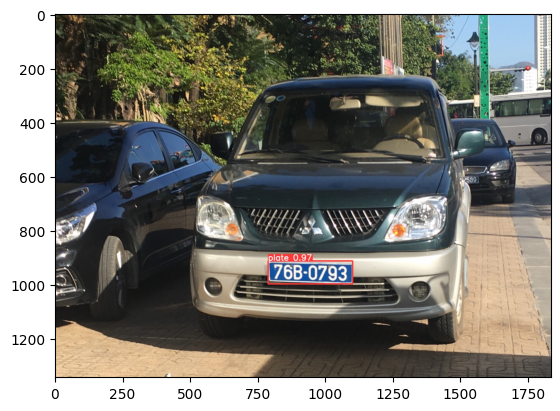

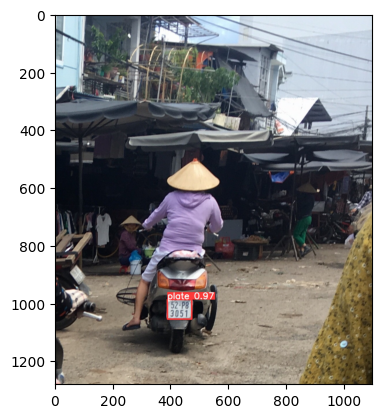

In [5]:
def show_result(path):
    for file in glob.glob(path + '/*.jpg'):
        result = Image.open(file)
        plt.imshow(result)
        plt.show()

show_result('yolov5/runs/detect/exp')

## Recognition stage


### Recognize the number text on detected plates 

76B-0793


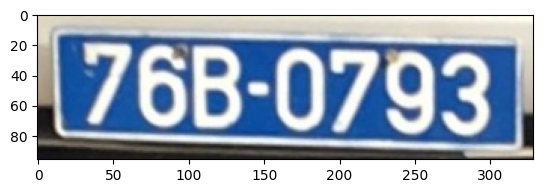

52*P8 3051


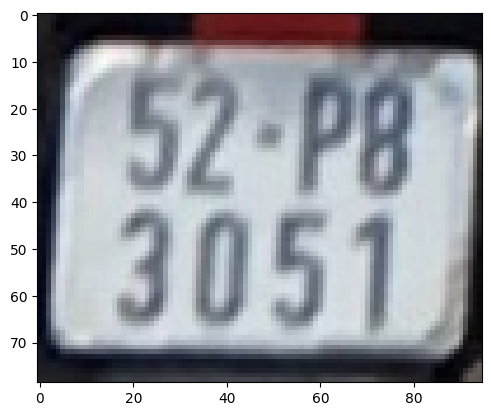

In [6]:
crop_dir = './yolov5/runs/detect/exp/crops/plate' # Change 'exp' here
for file in os.listdir(crop_dir):
    img = crop_dir + '/' + file
    image = Image.open(img)
    reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
    result = " ".join(reader.readtext(img, detail = 0))
    print(result)
    plt.imshow(image)
    plt.show()
    

### This is the end of our tutorial!